# The Sparks Foundation
# #GRIPDEC22  
# TASK-1: Prediction using Supervised ML

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn.linear_model import LinearRegression 
import statsmodels.api as sm
import seaborn as sns
sns.set() 

# Reading data from remote link

In [2]:
url = "http://bit.ly/w-data"
ds = pd.read_csv(url)
print("Data imported successfully")

ds.tail()

Data imported successfully


,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [3]:
ds.shape #The data has 25 rows and 2 columns

(25, 2)

In [4]:
ds.describe() 

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
x1 = ds['Hours']
y = ds['Scores']

## Plotting the distribution of scores

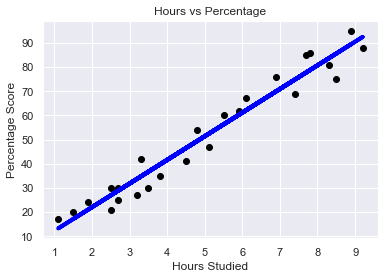

In [6]:
plt.scatter(x1,y, color = 'black')
yhat = 9.7758*x1 + 2.4837
fig = plt.plot(x1, yhat, lw=4, c='blue', label='regression line')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### The above plot clearly shows that the relation between the number of hours studied and percentage of score is linear and positive.

# Defining independent and independent variables

In [7]:
indep_var = ds.iloc[:, :-1].values  #Hours
dep_var = ds.iloc[:, 1].values      #Scores

# Splitting dataset into training and testing set

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(indep_var,dep_var, test_size=0.2, random_state = 0)

# Training the algorithm

In [10]:
from sklearn.linear_model import LinearRegression  

reg = LinearRegression()  
reg.fit(x_train, y_train) 


LinearRegression()

## Thus size of train set : 20 and size of test set : 5

In [27]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(20, 1)
(20,)
(5, 1)
(5,)


## Visualising the training set result

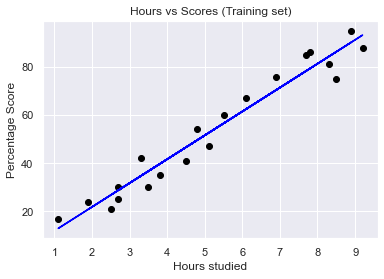

In [11]:
plt.scatter(x_train, y_train, color = 'black')
plt.plot(x_train, reg.predict(x_train), color = 'blue')
plt.title('Hours vs Scores (Training set)')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.show()

## Visualising the test set result

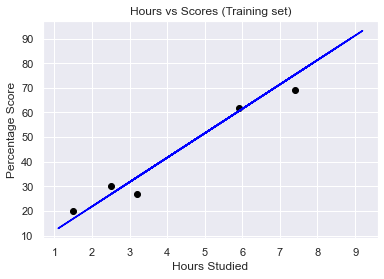

In [12]:
plt.scatter(x_test, y_test, color = 'black')
plt.plot(x_train, reg.predict(x_train), color = 'blue')
plt.title('Hours vs Scores (Training set)')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

## Testing data - In Hours

In [13]:
print(x_test)

# Predicting the scores
y_pred = reg.predict(x_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


## Comparing Actual vs Predicted 

In [14]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## r-squared describes the goodness of fit

In [16]:
from sklearn.metrics import r2_score
r2_score = reg.score(x_train,y_train)
print(r2_score*100,'%')

95.15510725211553 %


In [17]:
r2_score = reg.score(x_test,y_test)
print(r2_score*100,'%')

94.54906892105356 %


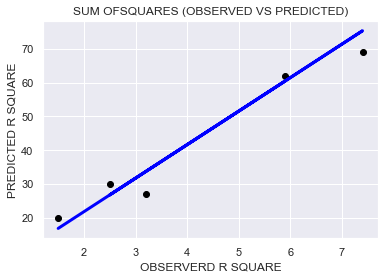

In [31]:
# R SQUARE PLOT
plt.scatter(x_test, y_test, color="black")
plt.plot(x_test, y_pred, color="blue", linewidth=3)
plt.title('SUM OFSQUARES (OBSERVED VS PREDICTED)')
plt.xlabel('OBSERVERD R SQUARE')
plt.ylabel('PREDICTED R SQUARE')
plt.show()

### The straight line can be seen in the plot, showing how linear regression attempts to draw a straight line that will best minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation.

## Checking the absolute error

In [15]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


### Mean Absolute Error - mean of the absolute values of each prediction error on all instances of the test dataset.

# Result

In [18]:
print("Average Hours studied is:",x_train.mean())
print("Average Percentage of Scores is:", y_train.mean(),'%') #trained dataset

Average Hours studied is: 5.24
Average Percentage of Scores is: 53.95 %


In [32]:
hrs = float(input("Enter no.of hours studied= "))
print("Prediction = {}".format(reg.predict([[hrs]])[0]),'%') #prediction 

Enter no.of hours studied= 9.25
Prediction = 93.69173248737538 %


### - Mala Subramanian - 